## DBSCAN 與 HDBSCAN

In [14]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([[1, 3], [3, 2], [2, 4],[5,6],
              [8, 7], [8, 8], [6,9], [25, 80]])
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
print(clustering.labels_)
## 缺點：Clustering density 分布不均時不好用

[ 0  0  0 -1  1  1  1 -1]


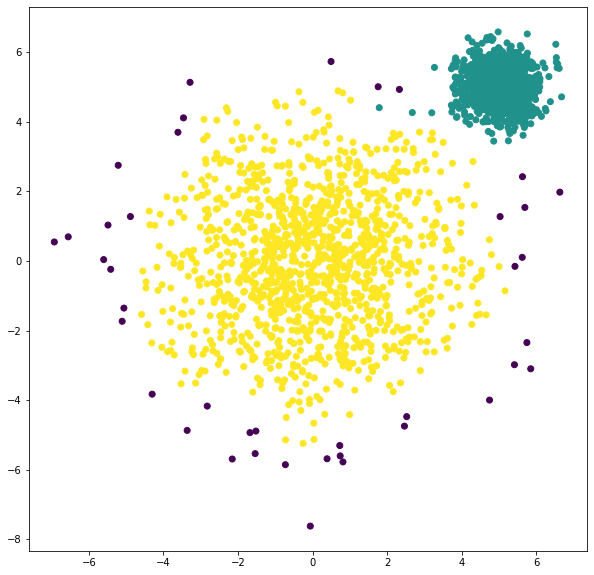

In [17]:
from sklearn.datasets import make_blobs
import hdbscan
import matplotlib.pyplot as plt
# HDBSCAN 用以解決 DBSCAN Clustering density的問題
N_SAMPLES = 2500
RANDOM_STATE = 50
X, y = make_blobs(n_samples=N_SAMPLES,
                  cluster_std=[2.0, 0.5],
                  centers=[(0, 0), (5, 5)],
                  random_state=RANDOM_STATE)

hclusterer = hdbscan.HDBSCAN(min_cluster_size=10).fit(X)

plt.figure(figsize = (10, 10))
plt.scatter(X[:, 0], X[:, 1], c = hclusterer.labels_)
plt.show()

## Wrapper methods

In [18]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
### 定義model
knn = KNeighborsClassifier(n_neighbors=3)
### 定義SFS，這裡使用KNN來當作選擇的model，最終希望變成3個feature，direction沒設代表default forward
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)
### 學習feature selection
sfs.fit(X, y)
sfs.get_support()
### 進行feature selectionc後，這裡把transform完的結果就是feature selection的dataset
sfs.transform(X).shape
# sfs.transform(X)

(150, 3)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target

knn = KNeighborsClassifier(n_neighbors=5)

efs1 = EFS(knn, 
           min_features=1,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

feature_names = ('sepal length', 'sepal width',
                 'petal length', 'petal width')

df_X = pd.DataFrame(
    X, columns=["Sepal length", "Sepal width", "Petal length", "Petal width"])
efs1 = efs1.fit(df_X, y)

df = pd.DataFrame.from_dict(efs1.get_metric_dict()).T
df.sort_values('avg_score', inplace=True, ascending=False)
df

Features: 15/15

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
14,"(0, 1, 2, 3)","[0.9666666666666667, 1.0, 0.9333333333333333, ...",0.973333,"(Sepal length, Sepal width, Petal length, Peta...",0.032061,0.024944,0.012472
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(Petal length, Petal width)",0.027096,0.021082,0.010541
12,"(0, 2, 3)","[0.9666666666666667, 1.0, 0.9, 0.9666666666666...",0.966667,"(Sepal length, Petal length, Petal width)",0.046932,0.036515,0.018257
13,"(1, 2, 3)","[0.9666666666666667, 1.0, 0.9333333333333333, ...",0.966667,"(Sepal width, Petal length, Petal width)",0.03832,0.029814,0.014907
3,"(3,)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(Petal width,)",0.032061,0.024944,0.012472
11,"(0, 1, 3)","[0.9333333333333333, 0.9666666666666667, 1.0, ...",0.96,"(Sepal length, Sepal width, Petal width)",0.032061,0.024944,0.012472
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(Sepal length, Petal width)",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(Sepal width, Petal length)",0.051412,0.04,0.02
8,"(1, 3)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.953333,"(Sepal width, Petal width)",0.043691,0.033993,0.016997
10,"(0, 1, 2)","[0.9666666666666667, 1.0, 0.8666666666666667, ...",0.946667,"(Sepal length, Sepal width, Petal length)",0.058115,0.045216,0.022608
